In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import inflace_csu

In [2]:
csv_str = inflace_csu.get_CSV() # no URL specified: get latest data from ČSÚ

request CSV from: "https://csu.gov.cz/docs/107508/650bf055-d14f-4ee1-dd72-7ba7f063fa77/010022-24data101024.csv?version=1.0"



In [3]:
data = inflace_csu.InflaceData(csv_str) # Load CSV string into InflaceData instance
                                        # The entire DataFrame can be accessed by .get_data_all()

In [4]:
data.list_ucel()    # List possible values for `ucel` (sector-specific).
                    # We preprocessed the `ucel_kod` values `NaN => 0`, which refer to all-sector data:

    ucel_kod                                      ucel_txt
0          0                                           NaN
1          1              Potraviny a nealkoholické nápoje
2          2         Alkoholické nápoje, tabák a narkotika
3          3                                Odívání a obuv
4          4                Bydlení, voda, energie, paliva
5          5  Bytové vybavení, zařízení domácnosti; opravy
6          6                                        Zdraví
7          7                                       Doprava
8          8                        Pošty a telekomunikace
9          9                            Rekreace a kultura
10        10                                    Vzdělávání
11        11                        Stravování a ubytování
12        12                        Ostatní zboží a služby


In [5]:
data.list_casz() # List possible values for `casz`:

  casz_kod                             casz_txt
0        Z                průměr bazického roku
1        C       stejné období předchozího roku
2        B                     předchozí období
3        K  stejných 12 měsíců předchozího roku


In [6]:
df_bazic = data.get_data(ucel=0, casz='Z')
df_meziroc = data.get_data(ucel=0, casz='C')
df_prumer = data.get_data(ucel=0, casz='K')
df_mezimes = data.get_data(ucel=0, casz='B')

print(df_bazic.tail(12)) # last 12 entries of dataframe

        rok  mesic  hodnota
12236  2023     10    148.1
1332   2023     11    148.2
5221   2023     12    147.6
12673  2024      1    149.8
8858   2024      2    150.2
3688   2024      3    150.4
2142   2024      4    151.4
3      2024      5    151.4
97     2024      6    151.0
16114  2024      7    152.0
16207  2024      8    152.4
7178   2024      9    151.8


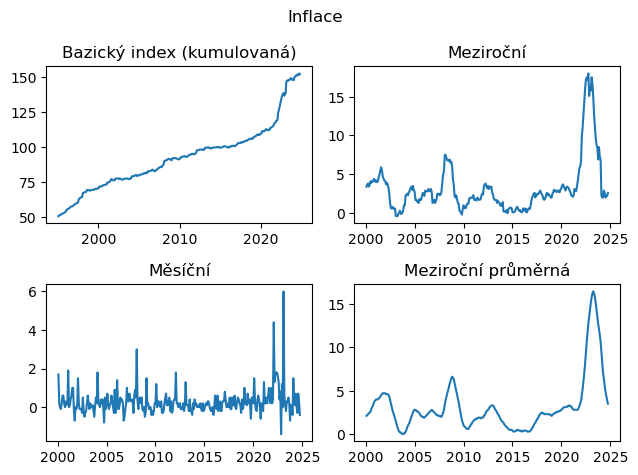

In [7]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Inflace')

axs[0,0].set_title('Bazický index (kumulovaná)')
axs[0,0].plot(df_bazic['rok'].values + df_bazic['mesic'].values/12.,
            df_bazic['hodnota'].values)

axs[0,1].set_title('Meziroční')
axs[0,1].plot(df_meziroc['rok'].values + df_meziroc['mesic'].values/12.,
            df_meziroc['hodnota'].values - 100)

axs[1,0].set_title('Měsíční')
axs[1,0].plot(df_mezimes['rok'].values + df_mezimes['mesic'].values/12.,
            df_mezimes['hodnota'].values - 100)

axs[1,1].set_title('Meziroční průměrná')
axs[1,1].plot(df_prumer['rok'].values + df_prumer['mesic'].values/12.,
            df_prumer['hodnota'].values - 100)

fig.tight_layout()